<a href="https://colab.research.google.com/github/SwathiR1999/building-RNN/blob/main/building_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/SwathiR1999/building-RNN.git
%cd building-RNN
!ls
! git pull

Cloning into 'building-RNN'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 25.33 KiB | 1.49 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/building-RNN
building_RNN.ipynb  Google_Stock_Price_Test.csv  Google_Stock_Price_Train.csv
Already up to date.


# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing datasets

In [3]:
df_train=pd.read_csv('Google_Stock_Price_Train.csv')
train_set=df_train.iloc[:,1:2].values

# Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_set_scaled = scaler.fit_transform(train_set)

# Creating a data structure with 60 timesteps and 1 output

In [5]:
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(train_set_scaled[i-60:i,0])
  y_train.append(train_set_scaled[i,0])
x_train,y_train=np.array(x_train), np.array(y_train)

# Reshaping

In [6]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Importing Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [14]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [17]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 17s 142ms/step - loss: 0.0408
Epoch 2/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0040
Epoch 13/100

# Making the predictions and visualising the results

### Getting the real stock price of 2017

In [20]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [22]:
dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 50ms/step


### Visualising the results

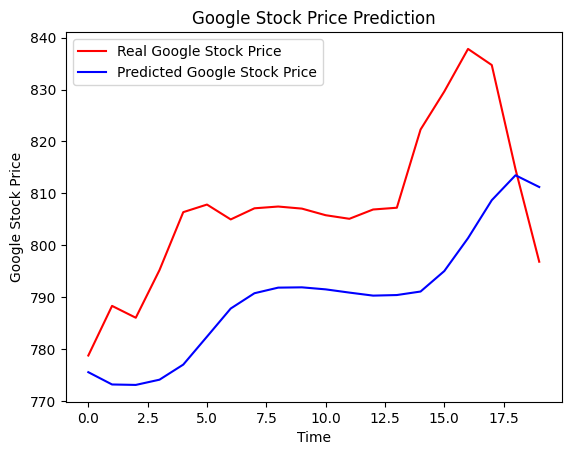

In [23]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()